# Machine Learning Online Class Exercise 7 | Principle Component Analysis and K-Means Clustering

In [205]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib import image as img
import seaborn as sns

sns.set(font_scale=1.3)

## K-means clustering
The goal of the k-means clustering is quite simple: Given a set of points $x_i\in\mathbb{R}^d$ $i=1,\dots,m$, find the cluster centroids $\mu_k\in\mathbb{R}^d$ $k=1,\dots,K$, such that
$$J(\mu)=\frac{1}{m}\sum_{i=1}^m|x_i-\mu_{c(i)}|^2,$$
is minimum, where $c(i)$ denotes the cluster where $x_i$ belongs.<br> 
<br>
The algorithm used to achieve approximately this goal is the following:
1. Initialize the centroids of the $K$ clusters.
2. Set the cluster belonging index $c(i)=k$ for every $x_i$ by asignning each point to the cluster $k$ which is closest to it. That it the one that minimizes $|x_i-\mu_k|$.
3. Move each cluster $\mu_k$ to the mean position of all the $x_i$ such that $c(i)=k$. 
4. If $\mu_k=\mu_{c(i)}$ for all clusters stop. Else go to 2.

Note that this algorithm does not assure that the global minimum of $J$ is reached, as it can get stuck into a local minumum. 

## ================= Part 1: Find Closest Centroids ====================

In [206]:
data = loadmat("ex7data2.mat")
X = data['X']
X.shape

(300, 2)

In [207]:
# Select an initial set of centroids
ini_centroids = np.array([[3,3],[6,2],[8,5]])

In [208]:
# Find the closest centroid to each sample
def findClosestCentroids(X, centroids):
    idx = [-1 for k in range(X.shape[0])]
    for i in range(X.shape[0]):
        md = 1.e8
        for j in range(centroids.shape[0]):
            d = np.linalg.norm(X[i]-centroids[j])
            if d < md:
                md = d
                idx[i] = j
    return np.array(idx).reshape(len(idx),1)


In [209]:
idx = findClosestCentroids(X, ini_centroids)
idx.shape

(300, 1)

In [210]:
print("Closest centroids for the first 3 examples: ")
print(idx[:3])
print("(the closest centroids should be 0, 2, 1 respectively)")

Closest centroids for the first 3 examples: 
[[0]
 [2]
 [1]]
(the closest centroids should be 0, 2, 1 respectively)


## ===================== Part 2: Compute Means =========================

In [211]:
#Compute means based on the closest centroids
def computeCentroids(X, idx, K):
    centroids = np.array([[0.0 for j in range(X.shape[1])] for i in range(K)])
    for i in range(K):
        ind = [x[0]==i for x in idx]
        XX = X[ind]
        for j in range(X.shape[1]):
            centroids[i][j] = np.mean(XX[:,j])
    return centroids

In [212]:
centroids = computeCentroids(X, idx, ini_centroids.shape[0])

In [213]:
print("Centroids computed after initial finding of closest centroids: ")
print(centroids)
print("the centroids should be")
print("[ 2.428301 3.157924 ]\n[ 5.813503 2.633656 ]\n[ 7.119387 3.616684 ]\n")

Centroids computed after initial finding of closest centroids: 
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
the centroids should be
[ 2.428301 3.157924 ]
[ 5.813503 2.633656 ]
[ 7.119387 3.616684 ]



## =================== Part 3: K-Means Clustering ======================

In [226]:
def runkMeans(X, ini_centroids, niter):
    K = ini_centroids.shape[0]
    centroids = ini_centroids
    idx = []
    
    for n in range(niter):
        print("iteration {0}...".format(n))
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

In [227]:
centroids, idx = runkMeans(X, ini_centroids, 10)

iteration 0...
iteration 1...
iteration 2...
iteration 3...
iteration 4...
iteration 5...
iteration 6...
iteration 7...
iteration 8...
iteration 9...


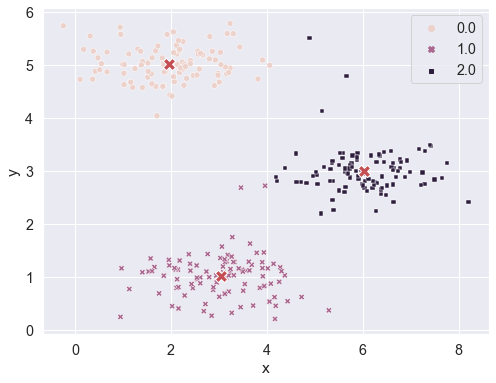

In [216]:
fig0, ax = plt.subplots(figsize=(8,6))
X_df = pd.DataFrame(np.concatenate((X,idx),axis=1), columns=['x', 'y', 'idx'])
sns.scatterplot(data=X_df, ax=ax, x='x', y='y', hue='idx', style='idx')
cent_df = pd.DataFrame(centroids, columns=['x', 'y'])
sns.scatterplot(data=cent_df, ax=ax, x='x', y='y', marker='X', s=150, color='r')

## ============= Part 4: K-Means Clustering on Pixels ===============

(128, 128, 3)

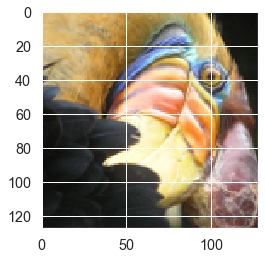

In [217]:
image = img.imread("bird_small.png")
plt.imshow(image)
image.shape

In [218]:
Xim = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
Xim.shape

(16384, 3)

In [219]:
def kMeansInitCentroids(X, K):
    centroids = np.array([[0.0 for j in range(X.shape[1])] for i in range(K)])
    for i in range(K):
        centroids[i] = np.random.random(X.shape[1])
    return centroids

In [220]:
#K most prevalen colors
K = 16
ini_cent = kMeansInitCentroids(Xim, K)
ini_cent.shape

(16, 3)

In [228]:
#find the K most prevalent colors (centroids in the RGB space)
cent, imid = runkMeans(Xim, ini_cent, 10)
cent.shape, imid.shape

iteration 0...
iteration 1...
iteration 2...
iteration 3...
iteration 4...
iteration 5...
iteration 6...
iteration 7...
iteration 8...
iteration 9...


((16, 3), (16384, 1))

## ================= Part 5: Image Compression ======================

In [230]:
#Obtain a version of the image that uses only the K colors of the centroids
X_recovered = np.array([cent[id][0] for id in imid])
X_recovered.shape

(16384, 3)

In [232]:
c_image = X_recovered.reshape(image.shape[0], image.shape[1], image.shape[2])
c_image.shape

(128, 128, 3)

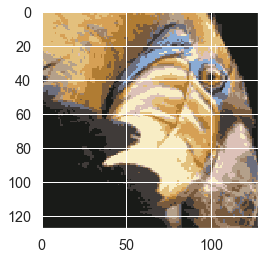

In [233]:
plt.imshow(c_image)